# ADS-505 Team 2 Loan Prediction Team Project
Dataset: Loan Approval Prediction Dataset [from Kaggle](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/code) \
Team Members: Ben Ogle, Roger Qiu, & Ue Wang

In [161]:
# import necessary packages
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import random
from sklearn.feature_selection import RFECV

In [162]:
# read in loan approval df
df = pd.read_csv('loan_approval_dataset.csv')

# field names have spaces before them, trim the space
df.columns = df.columns.str.strip()

# values have spaces, trim all values:
df = df.applymap(lambda x: x.strip() if type(x) == str else x)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### EDA - Ben Ogle

### Pre-processing and modeling Part 1 - UE Wang

### Pre-Processing and modeling Part 2 - Roger Qiu

In [163]:
# read in loan approval df
df = pd.read_csv('loan_approval_dataset.csv')

# field names have spaces before them, trim the space
df.columns = df.columns.str.strip()

# values have spaces, trim all values:
df = df.applymap(lambda x: x.strip() if type(x) == str else x)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [164]:
# check nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### Pre-Processing

In [165]:
# drop the loan_id field
df = df.drop(columns = 'loan_id')
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [166]:
# check categorical values of education
df['education'].value_counts()

Graduate        2144
Not Graduate    2125
Name: education, dtype: int64

In [167]:
# convert to 1 and 0
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df.groupby('education').size()

education
0    2125
1    2144
dtype: int64

In [168]:
# check categorical values of self employed
df['self_employed'].value_counts()

Yes    2150
No     2119
Name: self_employed, dtype: int64

In [169]:
# convert to 1 and 0
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df.groupby('self_employed').size()

self_employed
0    2119
1    2150
dtype: int64

In [170]:
# check count of values of loan_status field
df['loan_status'].value_counts()
# balanced, dataset, no need for stratified split

Approved    2656
Rejected    1613
Name: loan_status, dtype: int64

In [171]:
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})
df.groupby('loan_status').size()

loan_status
0    1613
1    2656
dtype: int64

In [172]:
# create X and y for features and labels
X = df.drop('loan_status', axis=1)
y = df['loan_status']

print(X.head())
print(y.head())

   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 2          1              0       9600000     29900000   
1                 0          0              1       4100000     12200000   
2                 3          1              0       9100000     29700000   
3                 3          1              0       8200000     30700000   
4                 5          0              1       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  
0             22700

In [173]:
# split the data into a 70/30 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 11)
(1281, 11)
(2988,)
(1281,)


In [174]:
# list of binary column names to not scale
binary_columns = ['education', 'self_employed']

# seperate the binary and non-binary columns
X_train_non_binary = X_train.drop(columns=binary_columns)
X_test_non_binary = X_test.drop(columns=binary_columns)
X_train_non_binary

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3404,4,2800000,8300000,14,381,3200000,1100000,9100000,1500000
781,3,9900000,20400000,4,865,26300000,3600000,36500000,12800000
3002,4,3500000,10700000,8,883,200000,2300000,8400000,2000000
4047,3,6400000,23000000,8,520,12100000,11400000,16000000,3800000
3391,2,3300000,6700000,8,845,1300000,4600000,12300000,3200000
...,...,...,...,...,...,...,...,...,...
3444,0,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,5,500000,1800000,18,411,1000000,500000,1300000,200000
3092,4,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,2,7000000,21400000,12,541,3700000,1300000,19800000,9600000


In [175]:
scaler = StandardScaler()

# fit the scaler with training data excluding binary columns and transform both train and test data
X_train_non_binary_scaled = scaler.fit_transform(X_train_non_binary)
X_test_non_binary_scaled = scaler.transform(X_test_non_binary)
X_train_non_binary_scaled

array([[ 0.93571344, -0.80804784, -0.76001369, ..., -0.8829542 ,
        -0.66673165, -1.0707675 ],
       [ 0.3421016 ,  1.70947574,  0.57116269, ..., -0.31157915,
         2.32080181,  2.41121979],
       [ 0.93571344, -0.55984129, -0.4959787 , ..., -0.60869418,
        -0.7430555 , -0.91669727],
       ...,
       [ 0.93571344,  1.24852072,  0.59316561, ...,  1.28827099,
         1.47033608,  0.13098032],
       [-0.25151024,  0.68119146,  0.68117727, ..., -0.8372442 ,
         0.49993288,  1.42517029],
       [ 0.93571344,  0.39752683,  0.2301175 , ..., -0.28872415,
         1.03419981, -0.11553205]])

In [176]:
# add back the binary columns to the scaled data
X_train_scaled = np.concatenate([X_train_non_binary_scaled, X_train[binary_columns].values], axis=1)
X_test_scaled = np.concatenate([X_test_non_binary_scaled, X_test[binary_columns].values], axis=1)

# check the first 5 rows of the scaled training data
print(X_train_scaled[:5])

[[ 0.93571344 -0.80804784 -0.76001369  0.52634731 -1.2697434  -0.64906817
  -0.8829542  -0.66673165 -1.0707675   0.          0.        ]
 [ 0.3421016   1.70947574  0.57116269 -1.22540782  1.52250274  2.87209808
  -0.31157915  2.32080181  2.41121979  0.          1.        ]
 [ 0.93571344 -0.55984129 -0.4959787  -0.52470577  1.6263466  -1.10636249
  -0.60869418 -0.7430555  -0.91669727  1.          1.        ]
 [ 0.3421016   0.46844299  0.85720059 -0.52470577 -0.467838    0.70757164
   1.471111    0.08560342 -0.36204443  0.          0.        ]
 [-0.25151024 -0.63075745 -0.93603701 -0.52470577  1.40712067 -0.9386879
  -0.08302913 -0.31782263 -0.54692871  1.          1.        ]]


### Random Forest

In [177]:
# create a random forest classifier
forest_model = RandomForestClassifier()

# train model with features and labels
forest_model.fit(X_train_scaled, y_train)

# create predictions using test data
forest_y_pred = forest_model.predict(X_test_scaled)

# get the AUC score by comparing predictions to the actual test values
auc_score = roc_auc_score(y_test, forest_y_pred)

# get the accuracy score by comparing predictions to the actual test values
accuracy = accuracy_score(y_test, forest_y_pred)

print("AUC score:")
print(auc_score)

print("Accuracy score:")
print(accuracy)

AUC score:
0.9751631674136981
Accuracy score:
0.9781420765027322


In [178]:
# create classification report
report = classification_report(y_test, forest_y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       471
           1       0.98      0.99      0.98       810

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281



Precision is the correctly predicted positive instances to the total predicted positive labels. So a precision of .98 means that the model was correct 98% of the time it predicted the positive class. This is the amount of people that the model predicted to have aproved loans did have approvals.

Recall or sensitivity is the correctly predicted positive instances to all actual positive labels. A recall of 0.98 means that the model correctly found 98% of all actual positive approval instances. So out of all the people with approvals, the model found 98% of them.

Accuracy is .96 but AUC scores are better to get an understanding of the models trade off between true positives (recall) and false positives (1 - specificity) at each threshold.

Our AUC of .97 tells us it is a good classifier in distinguishing between positive and negative cases. The higher this score the better, an AUC of 1 is a perfect model and 0.5 is as good as a random model.

In [179]:
# create a confusion matrix
matrix = confusion_matrix(y_test, forest_y_pred)
print("Confusion matrix:")
print(matrix)

Confusion matrix:
[[454  17]
 [ 11 799]]


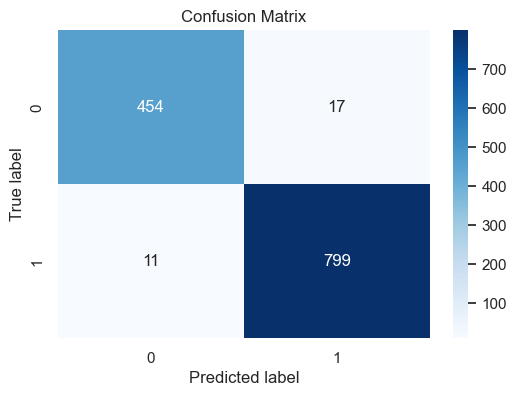

In [180]:
# create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

# add labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()

From the confusion matrix:

The top left is True Negatives, these are the instances were the model correctly predicted negative for approvals: 454

The top right is is the False Positives, where the model incorrectly predicted the positive class: 17

The bottom left is the False Negatives, the model incorrectly predicted the negative class: 11

The bottom right is the True Positives, these are the cases where the model correctly predicted the positive class: 799

In [181]:
# get feature importance
importance = forest_model.feature_importances_

# print important next to the column names
importance_series = pd.Series(importance, index=X_train.columns)
print(importance_series.sort_values(ascending=False))

loan_amount                 0.816214
income_annum                0.060920
self_employed               0.027540
residential_assets_value    0.017560
loan_term                   0.017077
education                   0.016672
cibil_score                 0.016259
commercial_assets_value     0.015714
no_of_dependents            0.007125
bank_asset_value            0.002696
luxury_assets_value         0.002224
dtype: float64


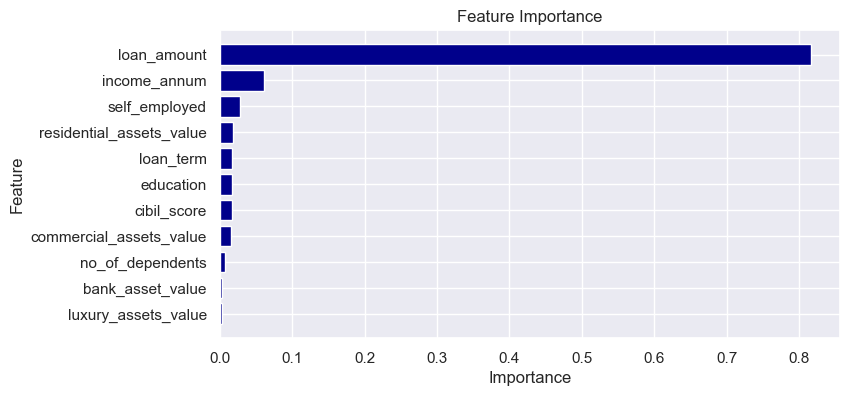

In [182]:
# sort feature importances in descending order
sorted_importances = importance_series.sort_values(ascending=False)

# create a bar plot
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,4))
plt.barh(sorted_importances.index, sorted_importances.values, color='darkblue')

# invert y-axis so that features with highest importance are at the top
plt.gca().invert_yaxis()

# add labels and title
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Here we can see how important each feature is in determining the outcome of the predictions for the random forest model.

### Stachastic Gradient Descent

### Neural Network

### Hyperparameter tuning with GridSearchCV